In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('Tree_Data.csv')

# Data Exploration
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Data Cleaning and Feature Engineering
data = data.drop(['Plot', 'Subplot', 'Time', 'Event', 'Harvest'], axis=1)

# Handle missing values
data['EMF'].fillna(data['EMF'].mean(), inplace=True)

Missing Values:
 No                0
Plot              0
Subplot           0
Species           0
Light_ISF         0
Light_Cat         0
Core              0
Soil              0
Adult             0
Sterile           0
Conspecific       0
Myco              0
SoilMyco          0
PlantDate         0
AMF               0
EMF            1500
Phenolics         0
Lignin            0
NSC               0
Census            0
Time              0
Event             1
Harvest        2079
Alive          2292
dtype: int64


In [2]:
# Encode categorical variables
le = LabelEncoder()
data['Light_Cat'] = le.fit_transform(data['Light_Cat'])
data['Soil'] = le.fit_transform(data['Soil'])
data['Sterile'] = le.fit_transform(data['Sterile'])
data['Species'] = le.fit_transform(data['Species'])
data['Conspecific'] = le.fit_transform(data['Conspecific'])
data['Myco'] = le.fit_transform(data['Myco'])
data['SoilMyco'] = le.fit_transform(data['SoilMyco'])

# Convert 'Adult' to string and then encode
data['Adult'] = data['Adult'].astype(str)
data['Adult'] = le.fit_transform(data['Adult'])

In [3]:
data.any().isnull()

No             False
Species        False
Light_ISF      False
Light_Cat      False
Core           False
Soil           False
Adult          False
Sterile        False
Conspecific    False
Myco           False
SoilMyco       False
PlantDate      False
AMF            False
EMF            False
Phenolics      False
Lignin         False
NSC            False
Census         False
Alive          False
dtype: bool

In [4]:
# Encode target variable
data['Alive'] = data['Alive'].map({'X': 1, np.nan: 0})

# Drop rows with null values in the target variable
data = data.dropna(subset=['Alive'])

# Identify object-type columns in X_train
object_columns = data.select_dtypes(include='object').columns

# Drop object-type columns from X_train
X = data.drop(object_columns, axis=1)
X = data.drop(['PlantDate', 'Alive'], axis=1)

# specify target variable
y = data['Alive'].copy()

In [5]:
y.unique()

array([0, 1], dtype=int64)

In [6]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classification Models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

In [7]:
X_train.dtypes

No               int64
Species          int32
Light_ISF      float64
Light_Cat        int32
Core             int64
Soil             int32
Adult            int32
Sterile          int32
Conspecific      int32
Myco             int32
SoilMyco         int32
AMF            float64
EMF            float64
Phenolics      float64
Lignin         float64
NSC            float64
Census           int64
dtype: object

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Accuracy: 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       465
           1       1.00      1.00      1.00        92

    accuracy                           1.00       557
   macro avg       1.00      1.00      1.00       557
weighted avg       1.00      1.00      1.00       557



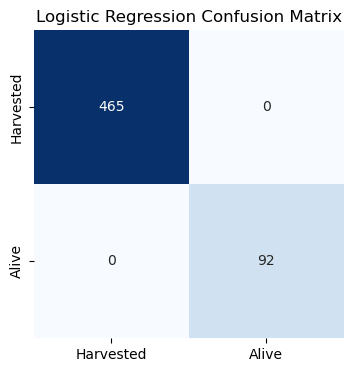


Random Forest Accuracy: 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       465
           1       1.00      1.00      1.00        92

    accuracy                           1.00       557
   macro avg       1.00      1.00      1.00       557
weighted avg       1.00      1.00      1.00       557



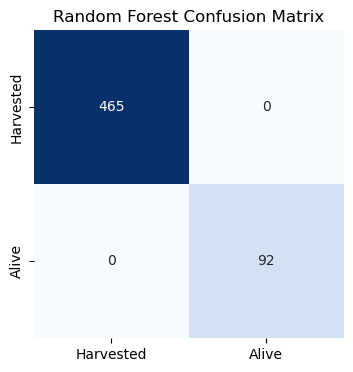


SVM Accuracy: 0.8348294434470377

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       465
           1       0.00      0.00      0.00        92

    accuracy                           0.83       557
   macro avg       0.42      0.50      0.45       557
weighted avg       0.70      0.83      0.76       557



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


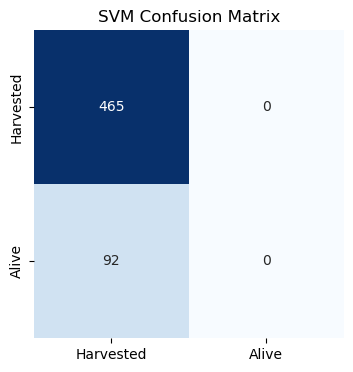

In [8]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {accuracy}\n")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Harvested', 'Alive'], yticklabels=['Harvested', 'Alive'])
    plt.title(f"{name} Confusion Matrix")
    plt.show()

In [9]:
# Select the Best Model (Logistic Regression in this case)
best_model = LogisticRegression()
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

# Key Findings and Insights
feature_importance = best_model.coef_[0]
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


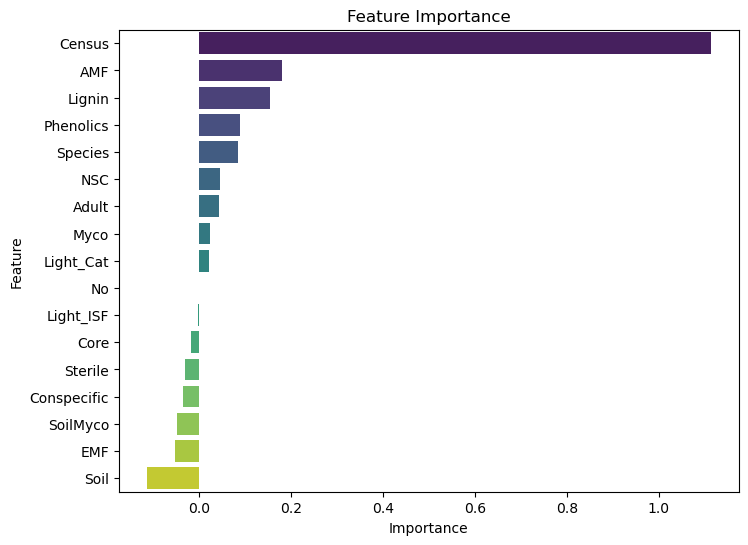

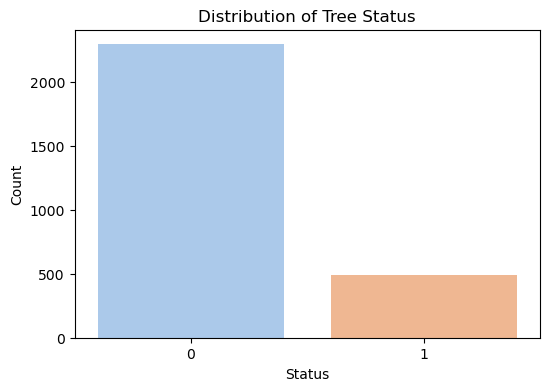

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


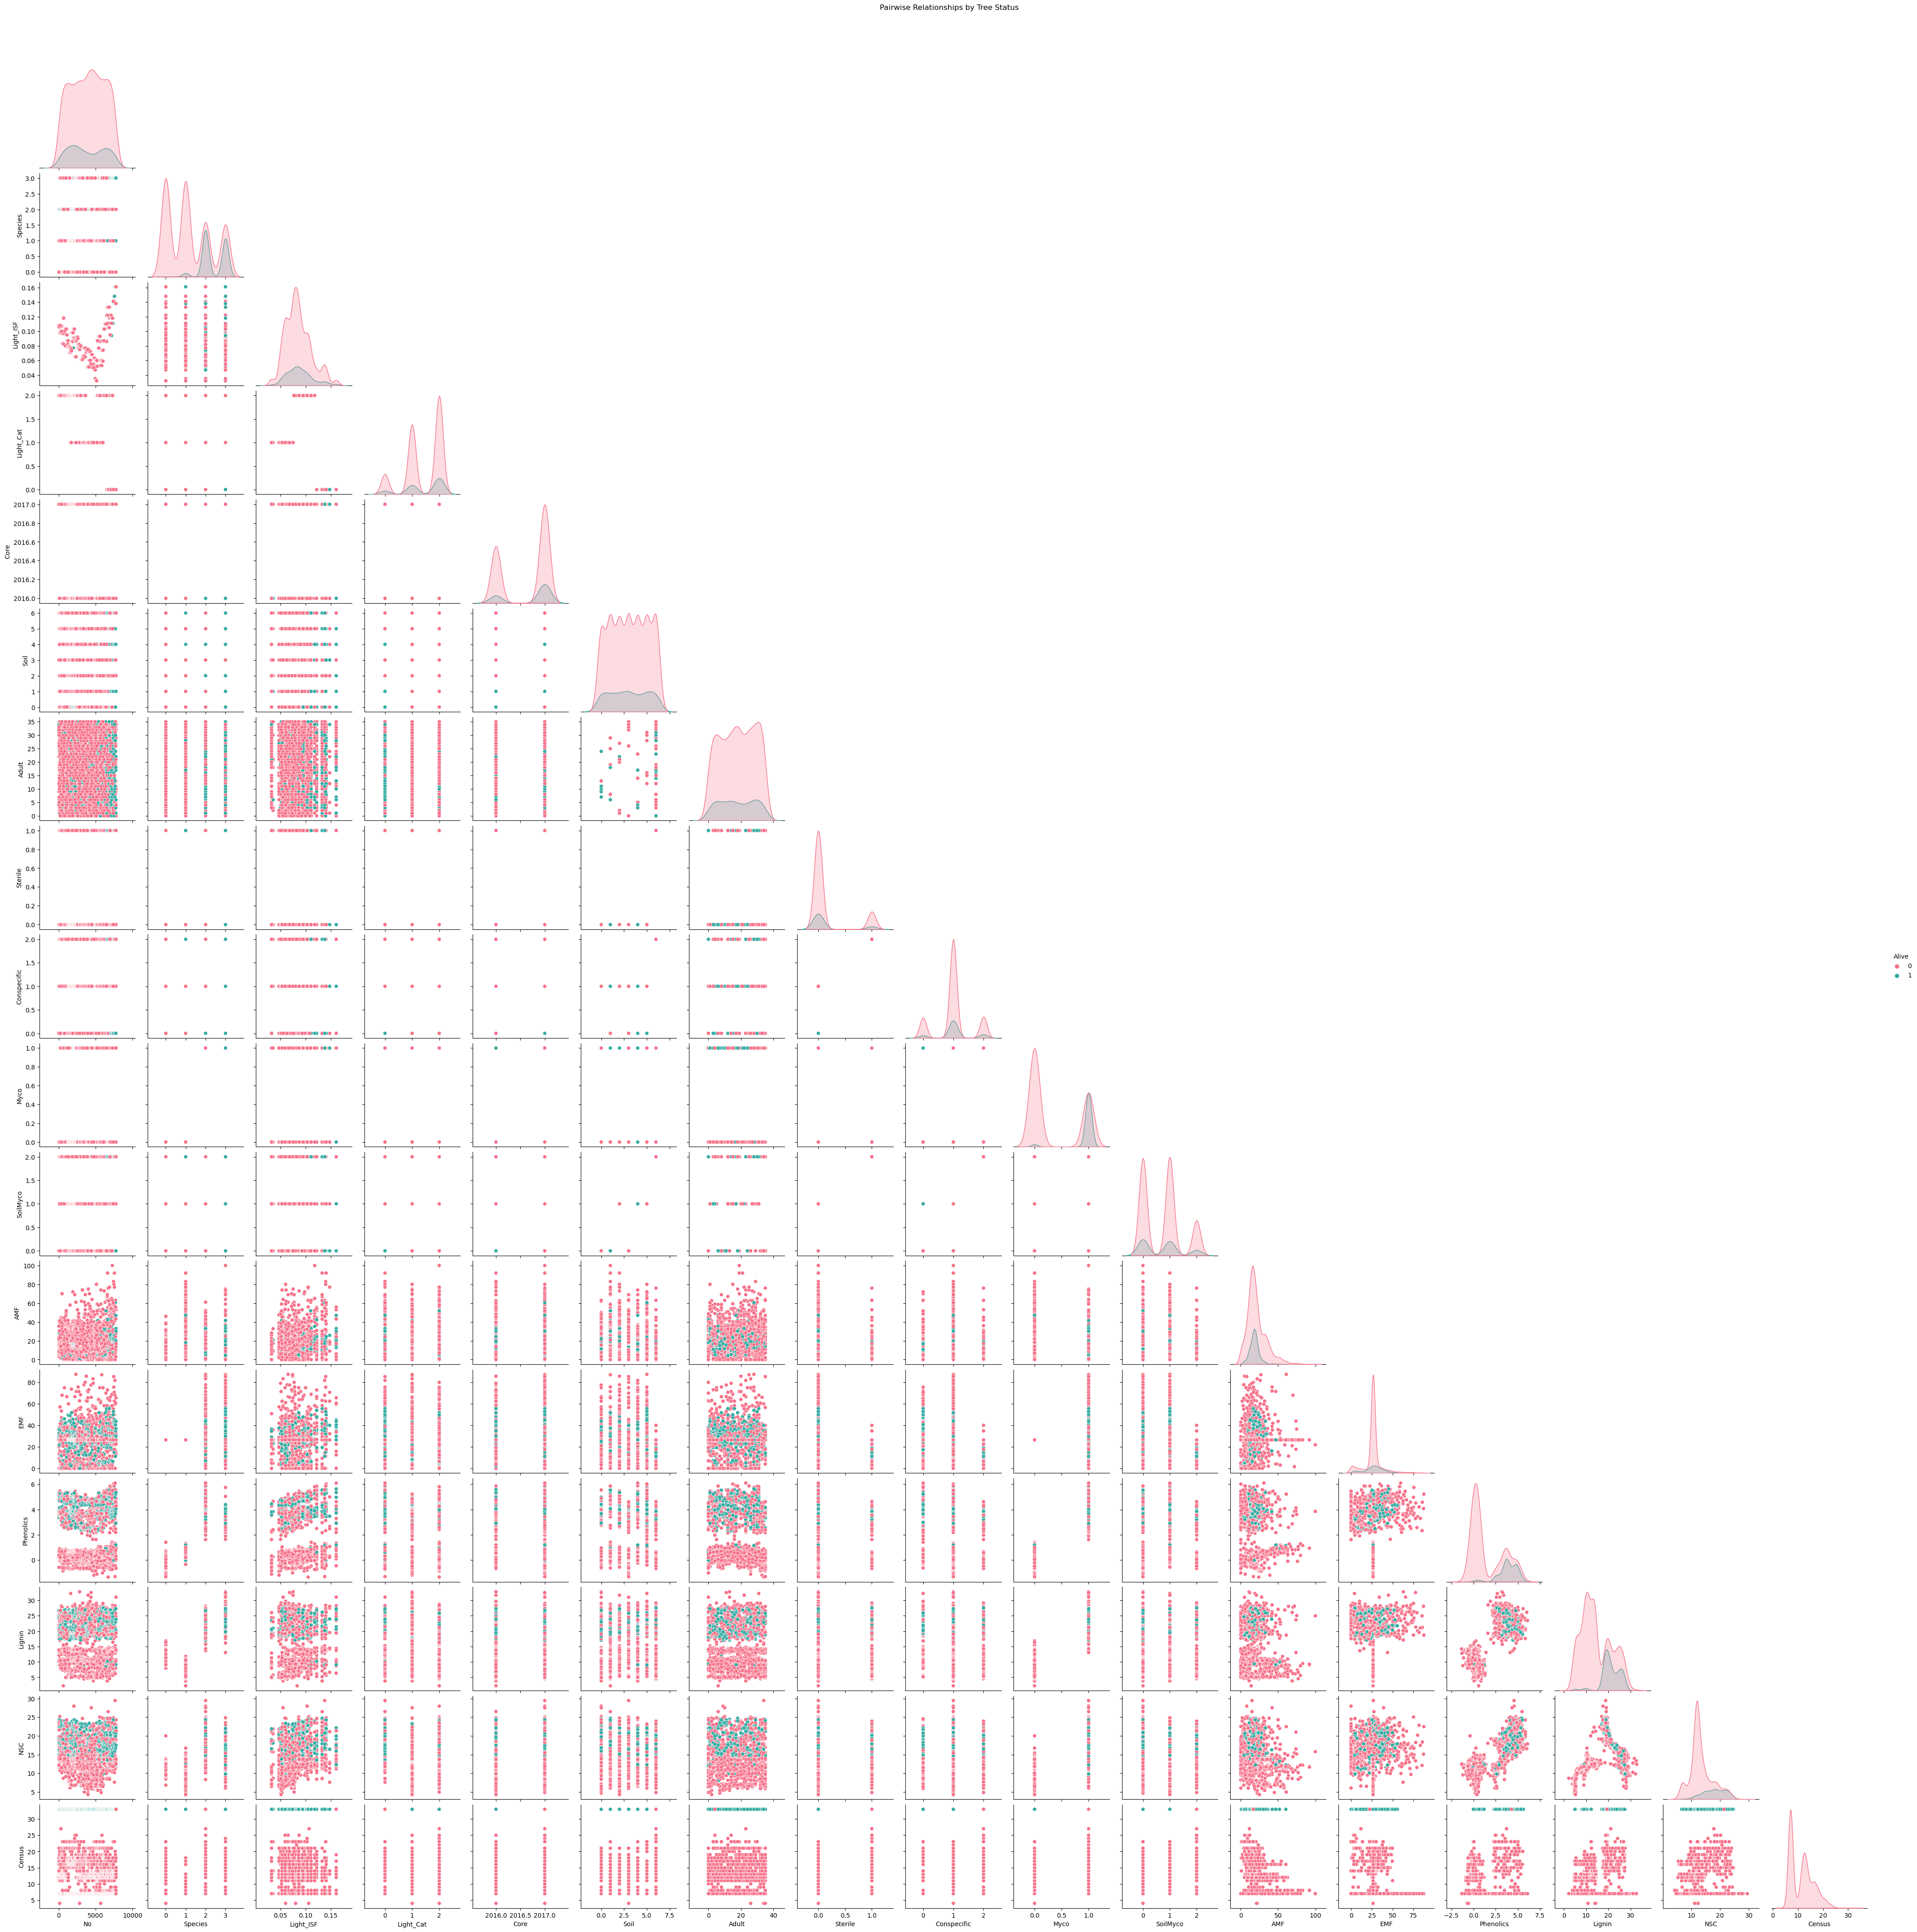

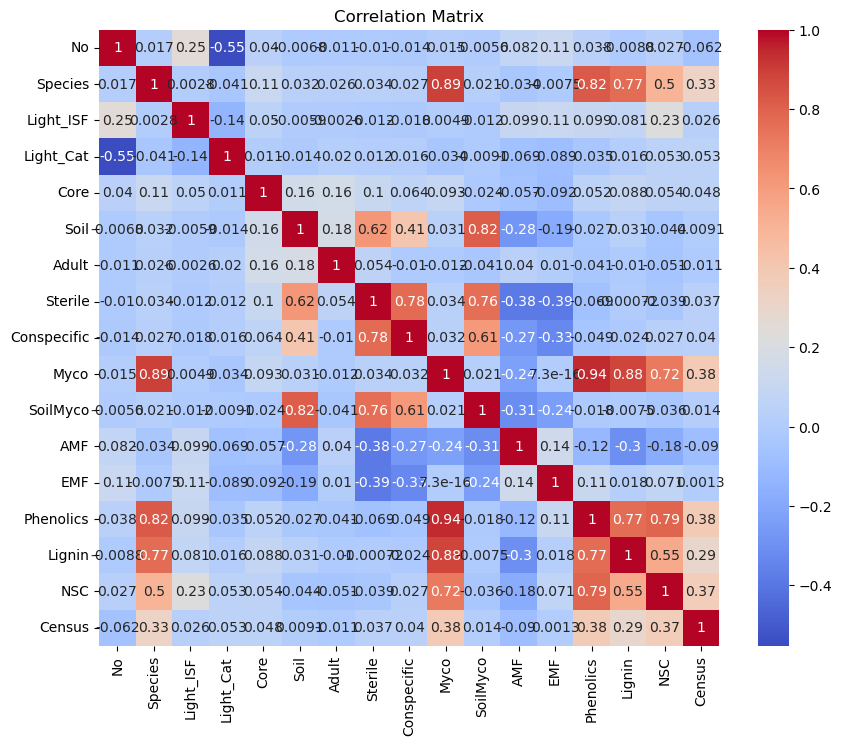

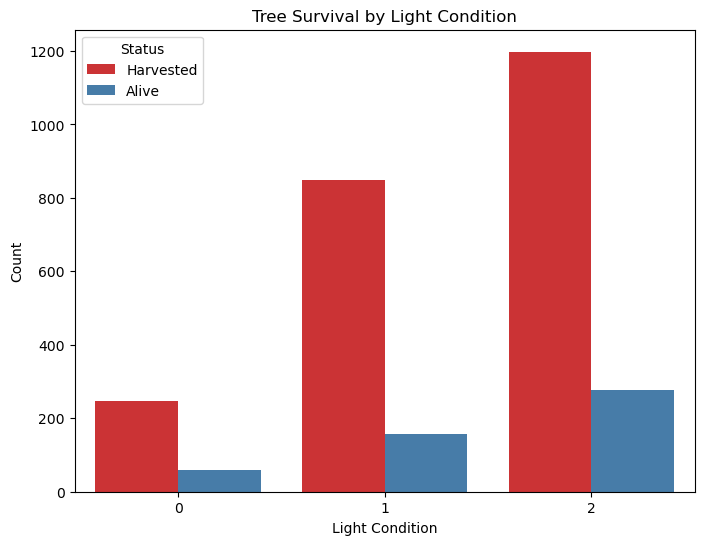

In [10]:
# Plot Feature Importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.show()

# Visualize Distribution of Tree Status
plt.figure(figsize=(6, 4))
sns.countplot(x='Alive', data=data, palette='pastel')
plt.title('Distribution of Tree Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

# Visualize Pairwise Relationships
sns.pairplot(data, hue='Alive', palette='husl', corner=True)
plt.suptitle('Pairwise Relationships by Tree Status', y=1.02)
plt.show()

# Visualize Correlation Matrix
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Visualize Survival by Light Condition
plt.figure(figsize=(8, 6))
sns.countplot(x='Light_Cat', hue='Alive', data=data, palette='Set1')
plt.title('Tree Survival by Light Condition')
plt.xlabel('Light Condition')
plt.ylabel('Count')
plt.legend(title='Status', labels=['Harvested', 'Alive'])
plt.show()